# 뉴스 카테고리 다중분류 프로젝트

### 데이터셋
Reuters 뉴스 기사 데이터
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기사의 주제로 46개의 레이블 존재
- 각 문서가 평균 120단어 정도로 짧고, 몇몇 상위 카테고리에 샘플이 집중되는 다중 클래스 불균형 특성

>로이터 뉴스 기사 데이터셋으로 아래의 2가지 실험을 진행하며 다중분류 문제를 해결한다.

<br>

### 실험 결과

**실험 1. 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)**

- 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델 비교
-벡터화는 tf-idf로 통일

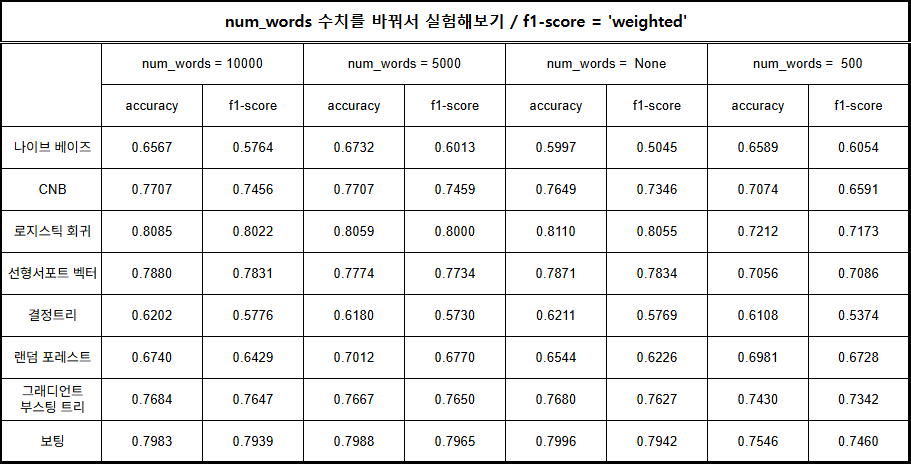

실험 결과, 성능이 가장 좋은 모델은 `로지스틱 회귀(Logistic Regression)`로 나타났다.  
정확도와 f1-score 모두에서 가장 높은 수치를 확인할 수 있다.  

- 로이터 뉴스 데이터는 고차원 희소 벡터에서 클래스 간 선형 분리가 가능하다. 로지스틱 회귀는 L2 규제를 적용한 선형 결정 경계를 학습하므로, 고차원에서 의외로 간단한(선형) 모델이 과적합을 피하면서도 가장 효과적으로 작동한 것으로 해석할 수 있다.

- 어휘 크기 효과 관찰
    - 10 k ↔ 5 k: 거의 변화 없음
    - inf(전체 단어)는 희귀 단어까지 포함해 희소성이 증가 (특히 나이브 베이즈·트리 계열 성능 ↓)
    - 500으로 지나치게 줄이면 정보 손실이 커져 모든 모델이 성능 저하

<br>

**실험 2. 벡터화 방법별 ML/DL 모델 성능 비교 (Accuracy / F1-score)**
- 벡터화 방법을 바꿔보며(DTM, W2V) 머신러닝 모델1개(성능 잘 나온 모델), 딥러닝 모델 2개(Dense, RNN) 비교

| Vectorization | Model           | Accuracy | F1-Score |
|---------------|------------------|----------|----------|
| Word2Vec      | ML Model (XGBoost) |    0.7306      |    0.7133      |
|               | Dense NN         |    0.6897      |    0.6717     |
|               | RNN (epoch=10)             |      0.7391    |    0.7032      |
|               | RNN  (epoch=20)             |     0.7689     |     0.7559     |

실험 결과, `RNN(epochs=20)`에서 정확도와 f1-score가 가장 높게 나타났다.

- 시퀀스 정보를 활용하는 RNN이 단어 순서·문맥 의존성을 일부 학습하므로 Dense NN(단순 평균 벡터)보다 높게 나왔다고 해석할 수 있다.
- Gradient boosting 트리는 순서를 잃은 고차원 실수 벡터에서 유의미한 분할을 찾기 어렵기 때문에 성능이 제한적임
- 평균 Word2Vec 벡터만 갖고는 문서 길이, 어휘 다양성을 충분히 표현하지 못해 RNN보다 저조함

<br>

>로이터 뉴스 분류처럼 문서가 비교적 짧고 주제어가 뚜렷한 문제에서는 단순 TF-IDF + 선형 분류기가 가장 높은 성능을 보인다는 것을 알 수 있었다. 상위 약 5 000 ~ 10 000개의 핵심 토큰만으로도 카테고리를 충분히 구분할 수 있고, 단어장을 무한대로 확장하면 희귀어 노이즈가 늘어나 오히려 성능이 떨어진다는 점도 확인할 수 있었다.

>동일한 데이터 규모와 문서 길이 조건에서 RNN 같은 딥러닝 모델은 문맥 정보를 활용하고도 학습 효율, 일반화 측면에서 선형 모델에 비해 불리하다는 사실을 확인하였다.

<br>
<br>

## 1. 데이터 준비하기

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 456.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 1.1 데이터 로드하기

훈련 데이터와 테스트 데이터 로드하기

In [ ]:
# 실험 1. num_words=10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [2]:
# 실험 2. num_words=5000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 실험 3. num_words=inf
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

<br>

### 1.2 데이터 복원하기
- 원본 뉴스 데이터로 복원해 보기

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- 정수 시퀀스를 텍스트 형태로 되돌리기
- index_to_word에 토큰 추가하기

In [4]:
index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 토큰 추가하기
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

<br>

전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환하기
- 훈련용 뉴스 데이터 변환하기

In [5]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


- 테스트용 뉴스 데이터 변환하기

In [6]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


<br>

### 1.3 벡터화: DTM , TF-idf
- DTM 생성
- DTM 행렬을 이어서 TF-IDF 행렬 만들기

In [7]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [8]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian <unk> senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial <unk> standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed <unk> <unk> credit using a variety of financial <unk> instead of <unk> <unk> on <unk> ability senate agriculture committee chairman <unk> <unk> d <unk> <unk> the proposed <unk> changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the <unk> purpose away from being <unk> <unk> of last <unk> toward becoming a big cit

<br>

- 벡터화: W2V 방법

In [9]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [10]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('simon', 0.7796254754066467), ('rica', 0.7670103907585144), ('cooperative', 0.7614181637763977), ('aids', 0.7597706317901611), ('indiana', 0.7565476298332214), ('andriessen', 0.7522429823875427), ('ontario', 0.7504765391349792), ('newspapers', 0.7486470937728882), ('bob', 0.7478368878364563), ('moore', 0.7466445565223694)]


In [11]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])

In [12]:
x_train_w2v.shape

(8982, 100, 256)

In [13]:
x_test_w2v.shape

(2246, 100, 256)

<br>
<br>

# 2. 모델 정의 및 실험

모델 학습: TF-idf데이터

In [ ]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

<br>

### 2.0 XGBoost

In [ ]:
# 0. XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7961
F1-score : 0.7897


<br>

### 2.1 Naive Bayes Classifier

In [ ]:
# 1. Naive Bayes
nv = MultinomialNB()
nv.fit(x_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = nv.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.6732
F1-score : 0.6013


<br>

### 2.3 CNB

Complement Naive Bayes Classifier

In [ ]:
# 2. CNB
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)

ComplementNB()

In [ ]:
y_pred = cb.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7707
F1-score : 0.7459


<br>

### 2.3 LogisticRegression

In [ ]:
# 3. Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [ ]:
y_pred = lr.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.8054
F1-score : 0.7993


<br>

### 2.4 LinearSupportVectorMachine

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [ ]:
y_pred = lsvc.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7774
F1-score : 0.7729


<br>

### 2.5 DecisionTree

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = tree.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.6180
F1-score : 0.5730


<br>

### 2.6. RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators=5, random_state=0)
rf.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
y_pred = rf.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7012
F1-score : 0.6770


<br>

### 2.7 GradientBoostingClassifier

In [ ]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(x_train_tfidf, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
y_pred = grbt.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7667
F1-score : 0.7650


<br>

### 2.8 Voting

In [ ]:
log_clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
nb_clf = ComplementNB()
gb_clf = GradientBoostingClassifier()

# Voting Classifier 선언
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('gb', gb_clf)
    ],
    voting='soft'
)
voting_classifier.fit(x_train_tfidf, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', ComplementNB()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [ ]:
y_pred = voting_classifier.predict(x_test_tfidf)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7988
F1-score : 0.7965


### +) W2V: XGBoost

In [ ]:
# 데이터를 단어단위에서 문장단위로 바꿔줘야 함 → ML은 2차원데이터만 받을수있기때문
# 문장에 대해서 토큰들의 벡터를 평균을 취해 줌

# Word2Vec 임베딩 시퀀스: (8982, 100, 256)
x_w2v_seq_train = x_train_w2v
x_w2v_seq_test = x_test_w2v

# 평균 풀링 → (8982, 256)
x_w2v_avg_train = np.mean(x_w2v_seq_train, axis=1)
x_w2v_avg_test = np.mean(x_w2v_seq_test, axis=1)
print(x_w2v_avg_train.shape)  # (8982, 256)

(8982, 256)


In [ ]:
# Word2Vec 데이터로 XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_w2v_avg_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb_model.predict(x_w2v_avg_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7306
F1-score : 0.7133


<br>
<br>

# 3. Dense NN 딥러닝 모델

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout

dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 → 46개
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,179,310 (50.28 MB)

 Trainable params: 13,179,310 (50.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5486 - loss: 2.0819 - val_accuracy: 0.6789 - val_loss: 1.3905
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6861 - loss: 1.3255 - val_accuracy: 0.6884 - val_loss: 1.3813
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7607 - loss: 0.9807 - val_accuracy: 0.6923 - val_loss: 1.3565
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7965 - loss: 0.8087 - val_accuracy: 0.6956 - val_loss: 1.4351
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8312 - loss: 0.6604 - val_accuracy: 0.6917 - val_loss: 1.4845
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8549 - loss: 0.5957 - val_accuracy: 0.6839 - val_loss: 1.5251
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8763 - loss: 0.5069 - val_accuracy: 0.6912 - val_loss: 1.6314
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8748 - loss: 0.5059 - val_accuracy: 0

In [ ]:
y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 0.6897
F1-score: 0.6717


# 4. RNN 딥러닝 모델

In [16]:
# rnn 시계열 특징 데이터 특화 모델

rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 → 46개
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,366 (813.93 KB)

 Trainable params: 208,366 (813.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# epochs=10
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.4129 - loss: 2.5263 - val_accuracy: 0.6155 - val_loss: 1.5935
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6131 - loss: 1.6445 - val_accuracy: 0.6550 - val_loss: 1.4281
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6502 - loss: 1.4707 - val_accuracy: 0.6789 - val_loss: 1.4271
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6784 - loss: 1.3844 - val_accuracy: 0.6956 - val_loss: 1.3306
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6846 - loss: 1.3026 - val_accuracy: 0.7073 - val_loss: 1.2462
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6916 - loss: 1.2681 - val_accuracy: 0.7290 - val_loss: 1.1725
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7288 - loss: 1.1424 - val_accuracy: 0.7212 - val_loss: 1.1720
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7278 - loss: 1.1196 - val_accu

In [18]:
# epochs=20
rnn_model.fit(x_train_w2v, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7492 - loss: 1.0277 - val_accuracy: 0.7451 - val_loss: 1.0805
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7586 - loss: 0.9686 - val_accuracy: 0.7507 - val_loss: 1.0747
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7484 - loss: 0.9952 - val_accuracy: 0.7568 - val_loss: 1.0586
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7741 - loss: 0.8863 - val_accuracy: 0.7535 - val_loss: 1.0700
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7770 - loss: 0.8678 - val_accuracy: 0.7507 - val_loss: 1.0606
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7873 - loss: 0.8393 - val_accuracy: 0.7635 - val_loss: 1.0439
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7990 - loss: 0.7872 - val_accuracy: 0.7518 - val_loss: 1.0589
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8066 - loss: 0.7598 - val_accu

# 로스가 떨어지는 폭을 보아하니 좀더 돌리면 점수가 더 높게 나올것같습니다!

여기까지 실험하고 시간이 좀 남으시는 분들만 실험해보시길

In [ ]:
# epochs=10
y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.7391
F1-score: 0.7032


In [19]:
# epochs=20
y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.7689
F1-score: 0.7559
